# MODELO DO PERCEPTRON 

Solução de problemas linearmente separáveis de classificação binária   
[Modelo de Rosemblat] - 1 neurônio

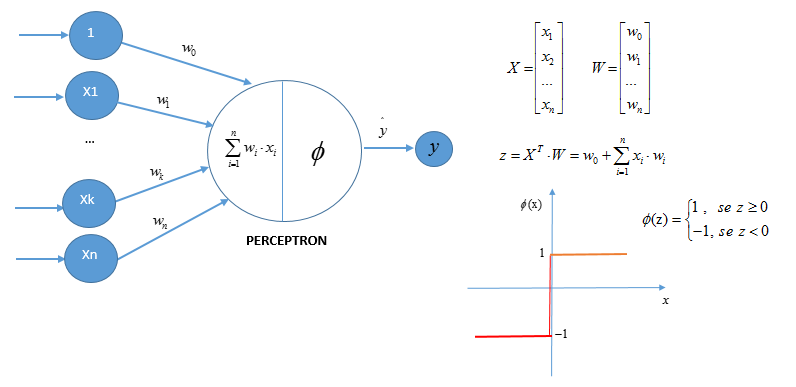

In [2]:
from IPython.display import Image
Image('img/ip1.png')

Algoritmo do Perceptron

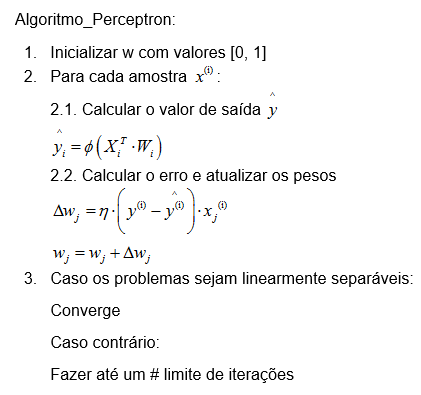

In [3]:
Image('img/ip2.png')

Implementação da Classe Perceptron

In [5]:
import numpy as np

In [30]:
class Perceptron(object):
    def __init__(self, eta = 0.01, n_iter = 10):
        self.eta = eta
        self.n_iter = n_iter
    
    def inicialize_attr(self, x):
        #inicializar pesos com vetor de zeros [1 dimensao mais que x]
        self.w_ = np.zeros(1 + x.shape[1])
        self.errors_ = []
    
    def fit(self, x, y):
        self.inicialize_attr(x)
        #iterações x treinamento
        for _ in range(self.n_iter):
            erro = 0 #erro acumulado x iteração
            for xi, yi in zip(x, y):
                delta_w = self.eta * (yi - self.predict(xi))
                self.w_[0] += delta_w
                self.w_[1:] += delta_w * xi
                if delta_w!=0:
                    erro += 1
            self.errors_.append(erro)
    def input_net(self, x):
        return np.dot(x, self.w_[1:]) + self.w_[0]
    
    def predict(self, x):
        return np.where(self.input_net(x)>=0, 1, -1)

Preprocessamento do dataset Iris

In [22]:
import pandas as pd

In [23]:
dataset = pd.read_csv('dataset/iris.data.txt', header = None)
dataset

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [24]:
x = dataset.iloc[:100, [0, 2]].values

In [25]:
y = dataset.iloc[:100, 4].values

In [26]:
y = np.where(y == 'Iris-setosa', -1, 1)

Analise exploratorio do comportamento das classes

In [27]:
import matplotlib.pyplot as plt

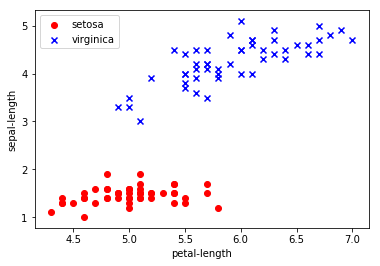

In [28]:
plt.scatter(x[:50, 0], x[:50, 1], color = 'red', marker = 'o', label = 'setosa')
plt.scatter(x[50:100, 0], x[50:100, 1], color = 'blue', marker = 'x', label = 'virginica')
plt.xlabel('petal-length')
plt.ylabel('sepal-length')
plt.legend(loc = 'upper left')
plt.show()

Treinamento e precisão do Modelo Perceptron

In [33]:
import warnings
warnings.filterwarnings('ignore')

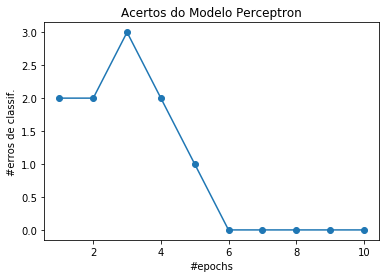

In [34]:
neuron = Perceptron(eta = 0.01, n_iter = 10)
neuron.fit(x, y)
plt.plot(range(1, len(neuron.errors_) +1), neuron.errors_, marker = 'o')
plt.title('Acertos do Modelo Perceptron')
plt.xlabel('#epochs')
plt.ylabel('#erros de classif.')
plt.legend(loc = 'upper left')
plt.show()

Visualizar fronteira de decisão

In [36]:
from matplotlib.colors import ListedColormap

In [43]:
def plot_decision_regions(x, y, classifier, resolution = 0.01):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #plotar a superficie de decisão
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                          np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha = 0.5, cmap = cmap)                                        
    plt.xlim(xx1.min(), xx1.max())                                        
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, classe in enumerate(np.unique(y)):
        plt.scatter(x[y == classe, 0], x[y == classe, 1], alpha = 0.8, 
                    color = cmap(idx), marker = markers[idx], label = classe)                


Gráfica da fronteira de decisão

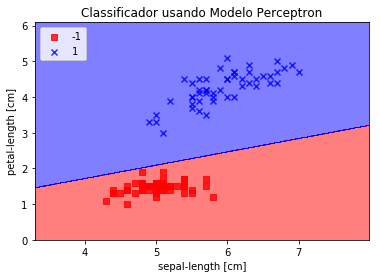

In [44]:
plot_decision_regions(x, y, neuron)
plt.xlabel('sepal-length [cm]')
plt.ylabel('petal-length [cm]')
plt.legend(loc = 'upper left')
plt.title('Classificador usando Modelo Perceptron')
plt.show()